<a href="https://colab.research.google.com/github/MaureenGatu/KNN-and-Naive-Bayes-ML-Models/blob/main/Spam_Email_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question

Using the given preprocessed data pertaining to emails sent out, create a model that can classify whter an email is spam or not.

## Understanding the context.

Email spam, also referred to as junk email or simply spam, is unsolicited messages sent in bulk by email (spamming). The legal definition and status of spam varies from one jurisdiction to another, but nowhere have laws and lawsuits been particularly successful in stemming spam.


Most email spam messages are commercial in nature. Whether commercial or not, many are not only annoying as a form of attention theft, but also dangerous because they may contain links that lead to phishing web sites or sites that are hosting malware or include malware as file attachments.

This analysis seeks to come up with a model that can accurately identify a spam email and classify it as such.

## Metrics of success

Create a model that is atleast 80% accurate in determining if an email is spam or not spam.

## Experimental design

1. Defing the question

2. Uploading the data

3. Cleaning the data

4. Exploratory analysis

6. Machine Learning model - Naive Bayes

7. Conclusion

# Uploading the data

In [1]:
import pandas as pd
import re

In [2]:
name_file = []
with open('/content/spambase.names') as f:
    name_file = f.read()

name_file

name_split = name_file.split(sep='\n')
name_split[33:]

name_cols = []
for line in name_split[33:]:
    matched = re.split(r':.*$', line)
    name_cols.append(matched[0])

name_cols = name_cols[:-1]
name_cols.append('spam')
df = pd.read_csv('/content/spambase.data', names =name_cols )


In [3]:
#Previewing the data
df.sample(8)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
2851,0.16,0.0,0.00,0.0,0.66,0.0,0.0,0.0,0.00,0.00,0.00,0.66,0.00,0.0,0.0,0.0,0.00,0.0,0.16,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.16,0.0,0.00,0.00,0.16,0.00,0.16,0.33,0.00,0.00,0.0,0.0,0.118,0.047,0.023,0.000,0.000,0.0,1.983,19,240,0
1444,0.60,0.0,0.36,0.0,1.44,0.0,0.0,0.0,0.24,1.32,0.72,2.52,0.60,0.0,0.0,0.6,0.24,0.0,4.44,0.0,1.80,0.0,0.72,0.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.0,0.0,0.000,0.041,0.000,0.102,0.205,0.0,3.548,54,479,1
3074,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,7.31,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.714,4,12,0
4011,0.00,0.0,0.00,0.0,0.90,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,2.70,0.0,0.90,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.80,0.0,0.00,0.00,0.00,0.00,1.80,0.00,0.90,0.00,0.0,0.0,0.000,0.000,0.000,0.281,0.000,0.0,1.551,13,76,0
4492,0.00,0.0,1.09,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,2.19,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.29,0.0,0.0,0.000,0.191,0.000,0.000,0.000,0.0,3.000,15,51,0
3523,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,4,0
4566,0.00,0.0,0.45,0.0,0.45,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.22,0.0,0.0,0.0,0.00,0.0,1.35,0.0,0.22,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.22,0.22,0.22,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.130,3,78,0
1988,0.27,0.0,0.27,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.81,0.00,0.0,0.0,0.0,0.00,0.0,0.54,0.0,0.27,0.0,0.00,0.00,9.83,0.81,0.54,0.27,0.27,0.27,0.27,0.27,0.0,0.27,0.27,0.27,0.54,0.0,0.27,0.27,0.00,0.54,0.54,0.00,0.54,0.00,0.0,0.0,1.411,1.411,0.041,0.000,0.000,0.0,4.891,20,675,0


In [4]:
#Shape of the data
df.shape

(4601, 58)

In [5]:
#dataset info and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

# Cleaning the data

In [6]:
#check for duplicates
df.duplicated().sum()

391

In [7]:
#Remove duplicated
df.drop_duplicates(inplace=True)

#recheck for duplicates
df.duplicated().sum()

0

In [8]:
#check for missing values
df.isnull().value_counts()

#There are no missing values

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  word_freq_order  word_freq_mail  word_freq_receive  word_freq_will  word_freq_people  word_freq_report  word_freq_addresses  word_freq_free  word_freq_business  word_freq_email  word_freq_you  word_freq_credit  word_freq_your  word_freq_font  word_freq_000  word_freq_money  word_freq_hp  word_freq_hpl  word_freq_george  word_freq_650  word_freq_lab  word_freq_labs  word_freq_telnet  word_freq_857  word_freq_data  word_freq_415  word_freq_85  word_freq_technology  word_freq_1999  word_freq_parts  word_freq_pm  word_freq_direct  word_freq_cs  word_freq_meeting  word_freq_original  word_freq_project  word_freq_re  word_freq_edu  word_freq_table  word_freq_conference  char_freq_;  char_freq_(  char_freq_[  char_freq_!  char_freq_$  char_freq_#  capital_run_length_average  capital_run_length_longest  capital_run_length_total  spam 
False           False       

In [9]:
#view the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 -Q1
outliers = df[((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
outliers.shape

(4096, 58)

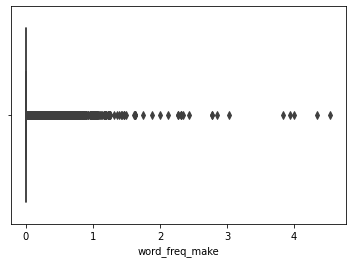

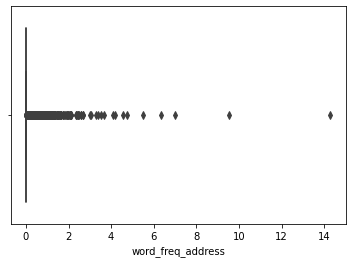

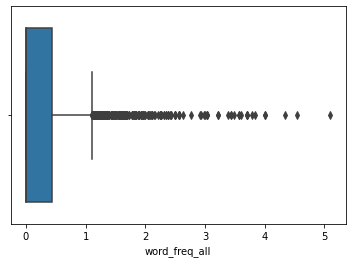

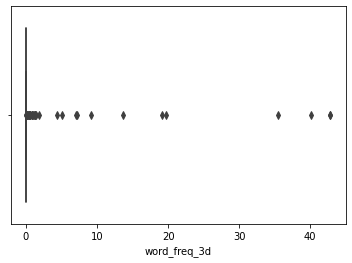

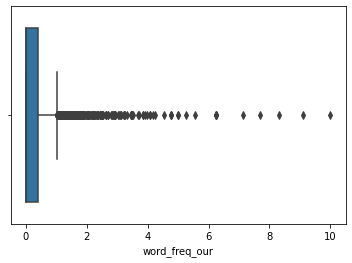

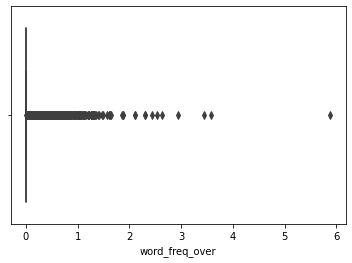

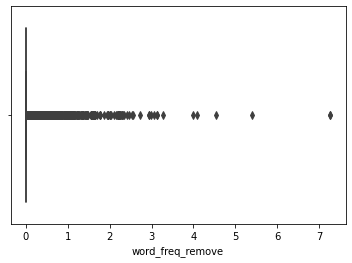

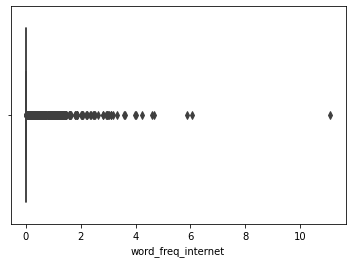

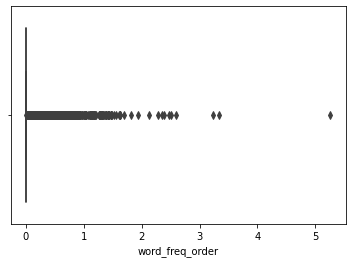

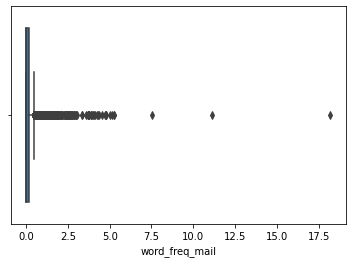

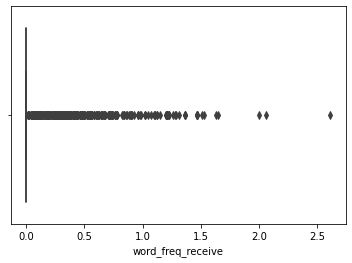

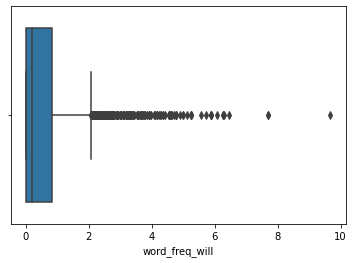

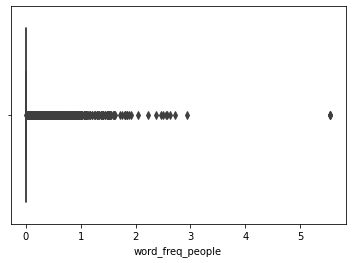

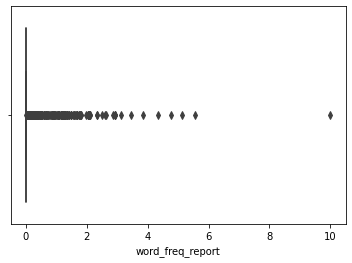

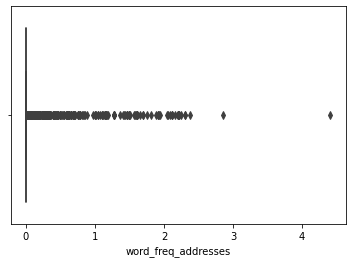

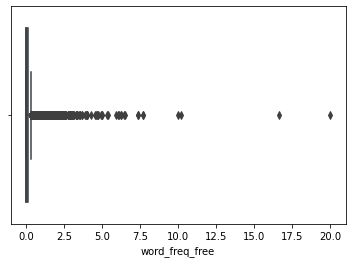

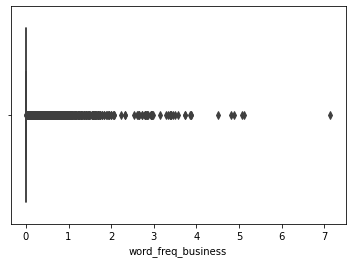

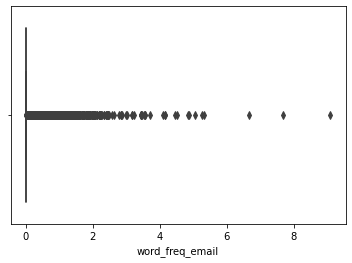

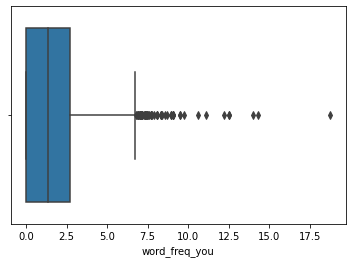

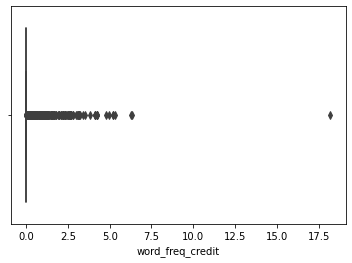

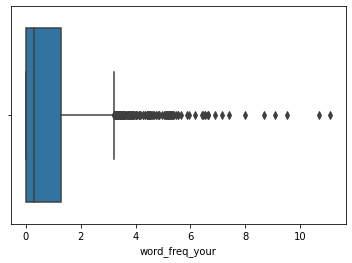

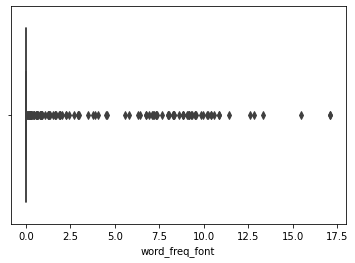

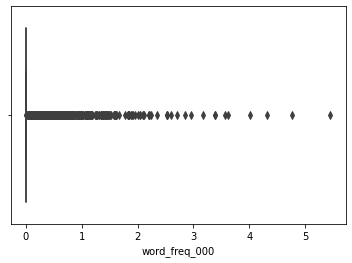

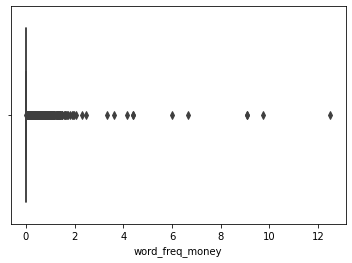

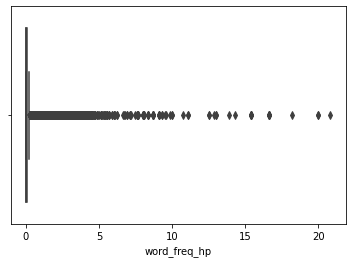

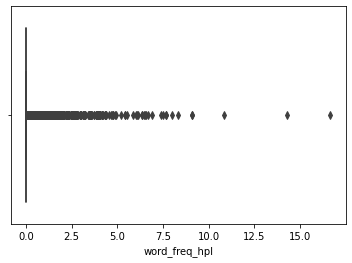

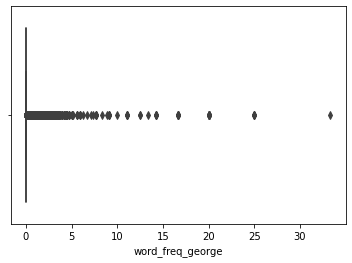

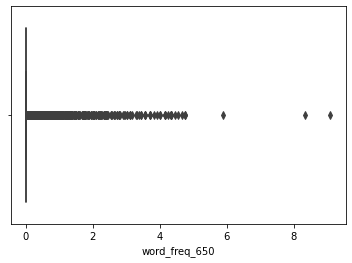

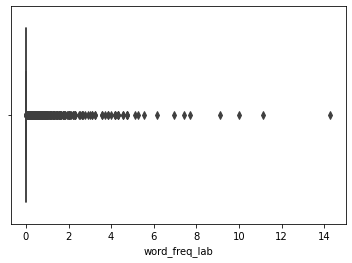

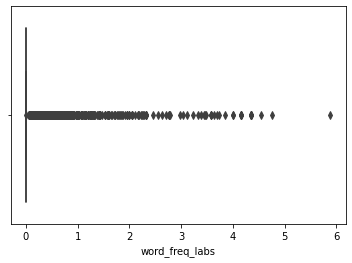

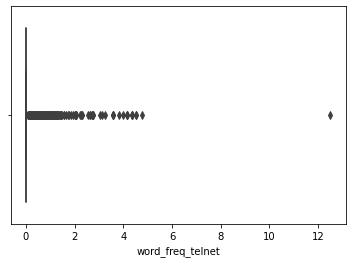

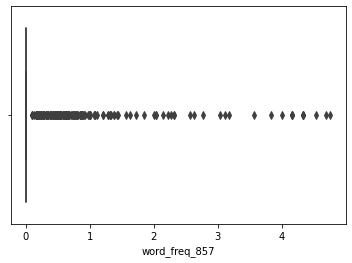

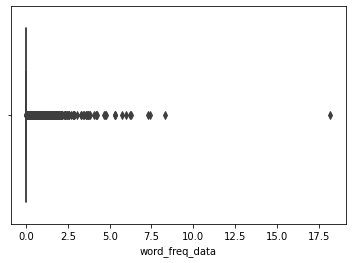

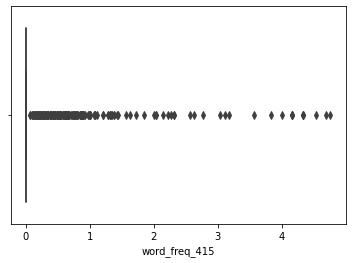

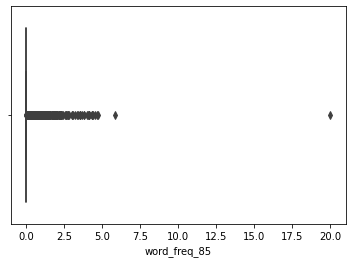

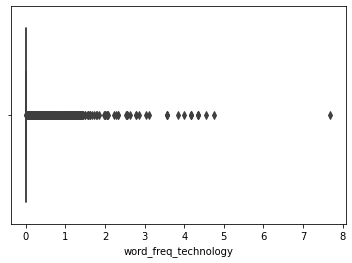

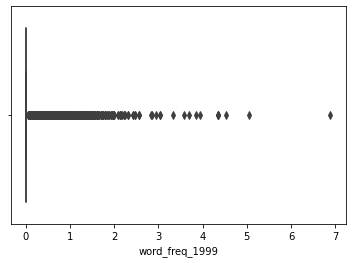

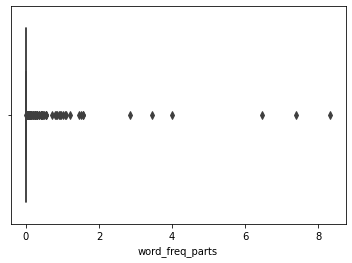

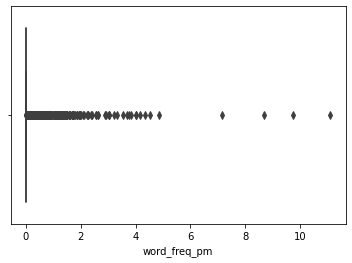

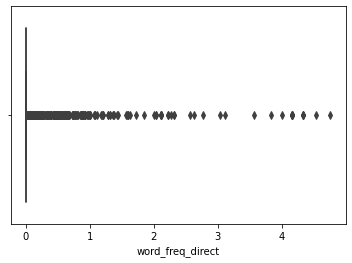

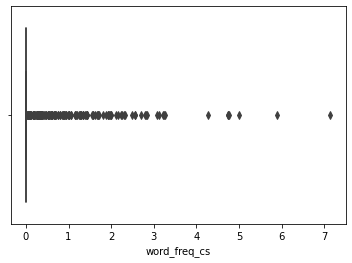

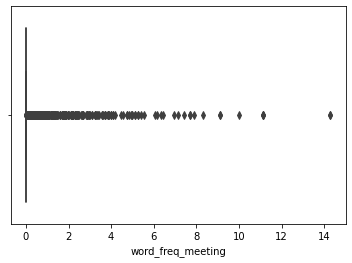

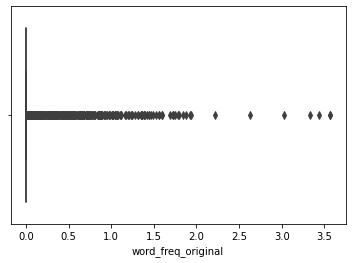

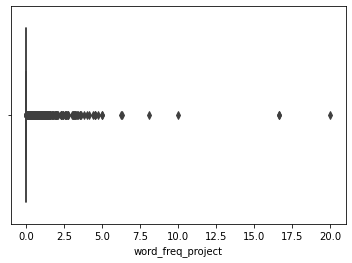

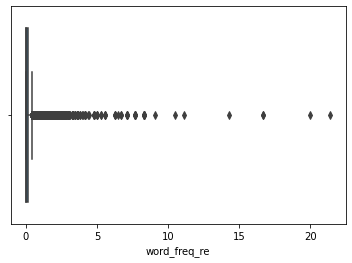

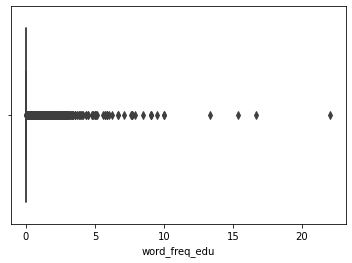

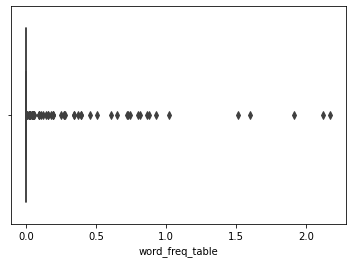

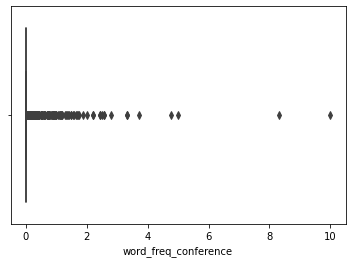

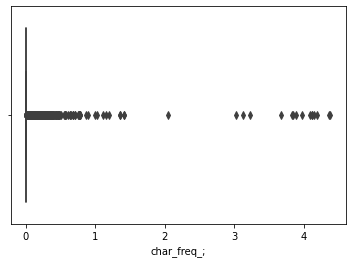

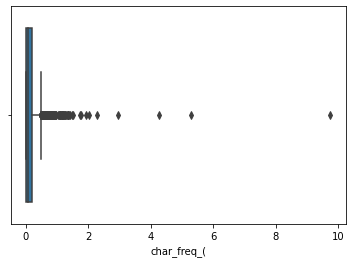

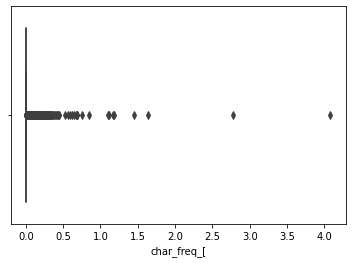

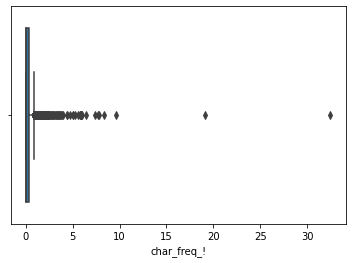

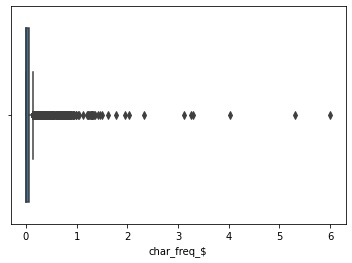

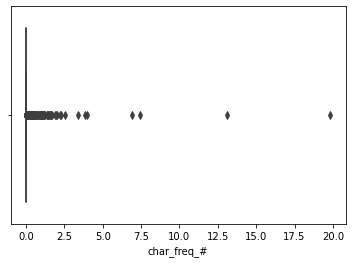

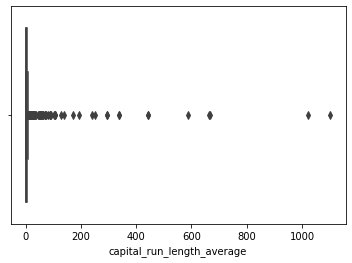

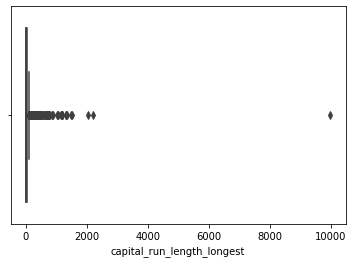

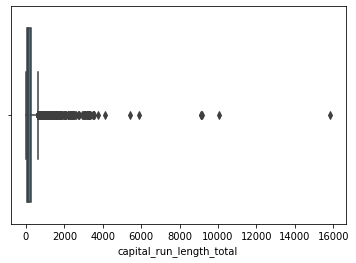

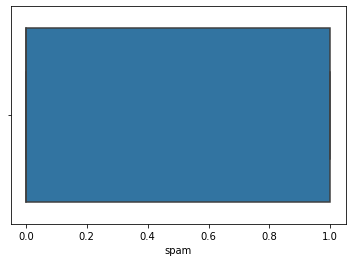

In [10]:
#Box plot of outliers

import matplotlib.pyplot as plt
import seaborn as sns

for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.boxplot(x=col, data=df)
    plt.show()

# Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


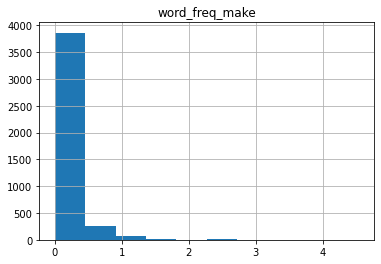

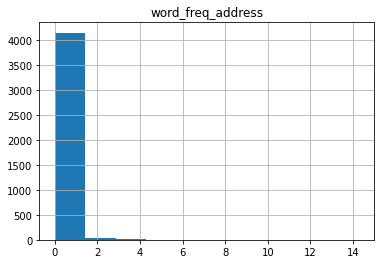

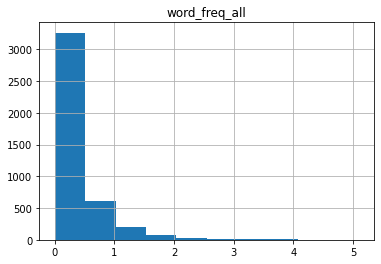

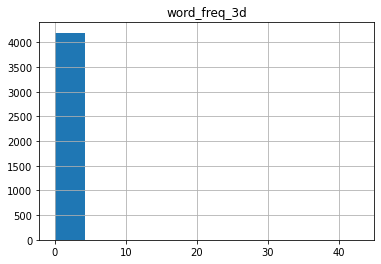

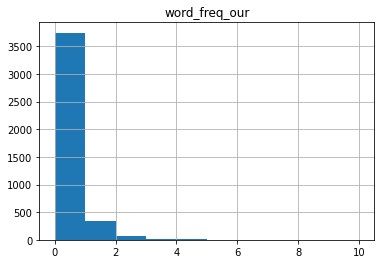

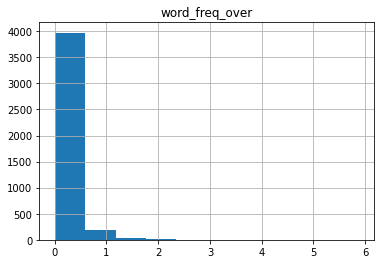

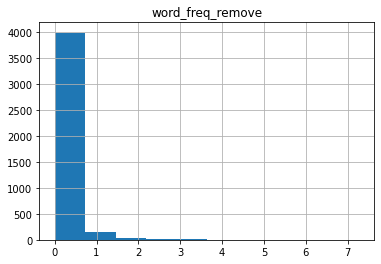

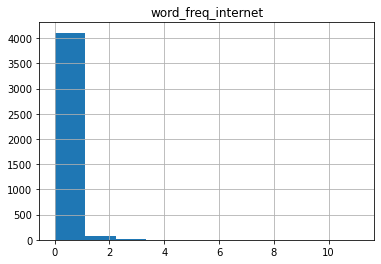

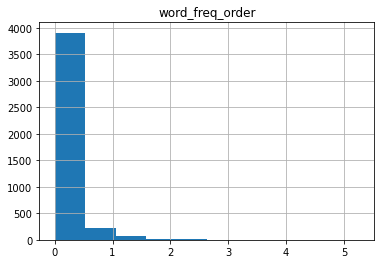

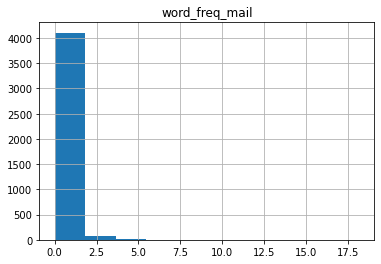

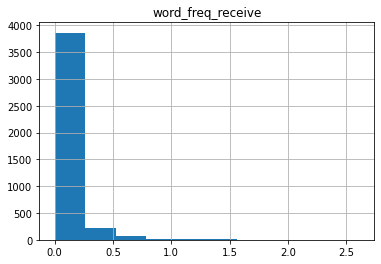

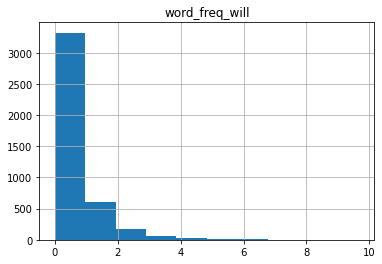

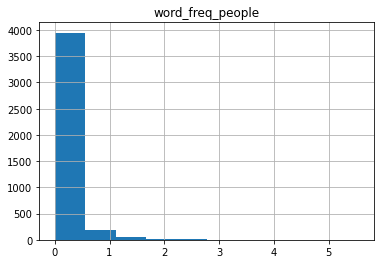

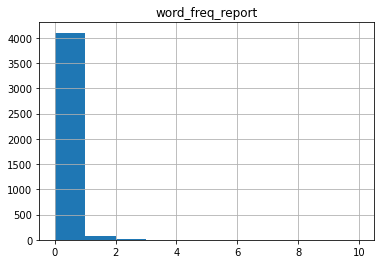

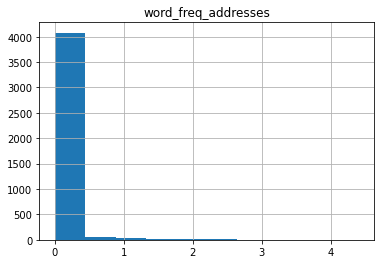

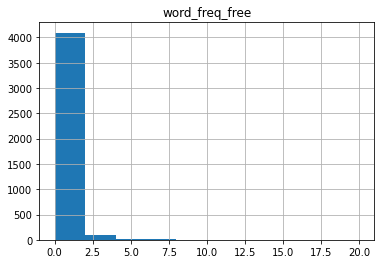

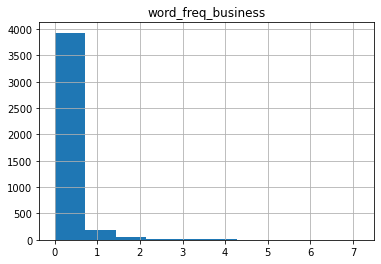

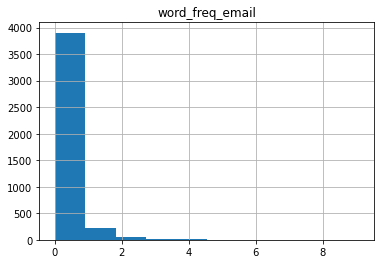

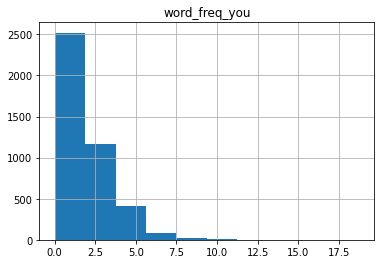

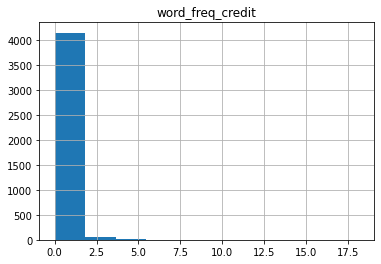

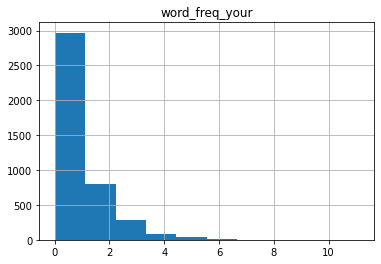

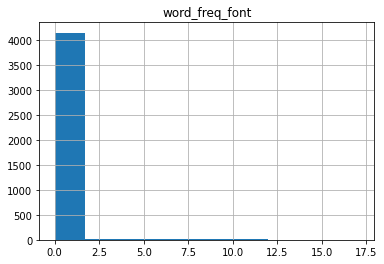

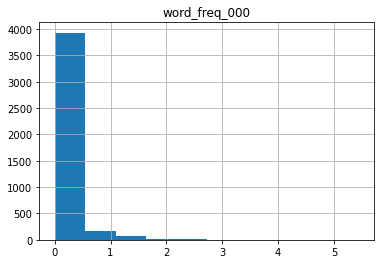

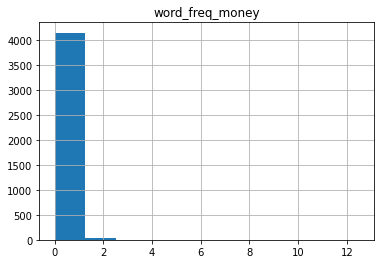

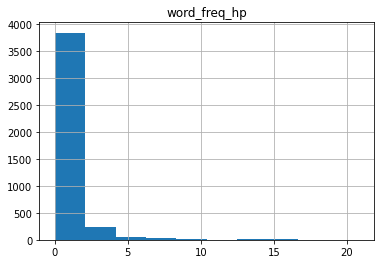

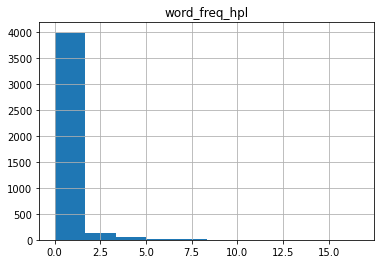

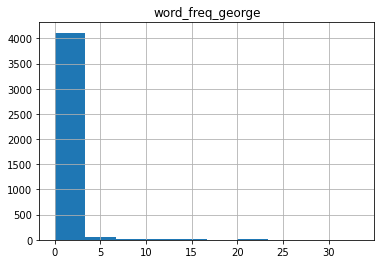

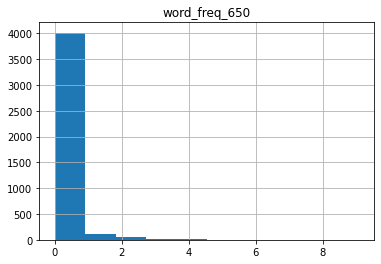

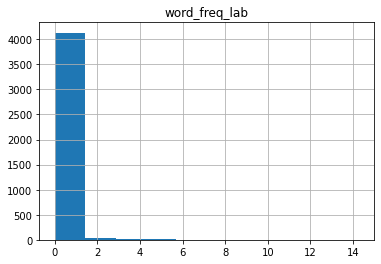

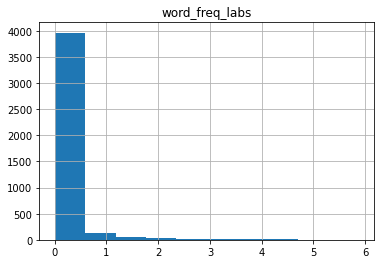

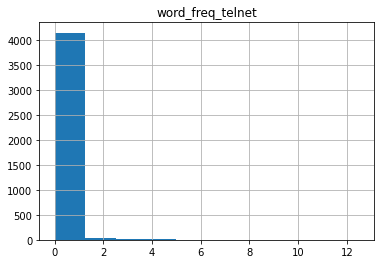

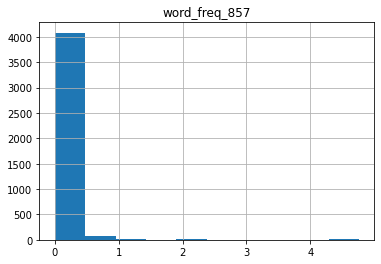

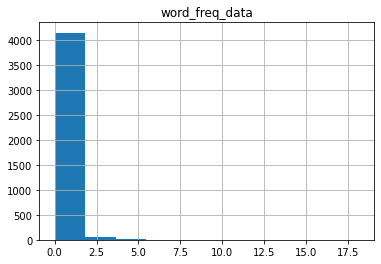

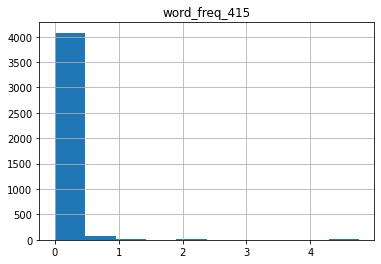

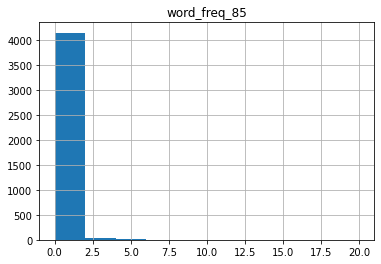

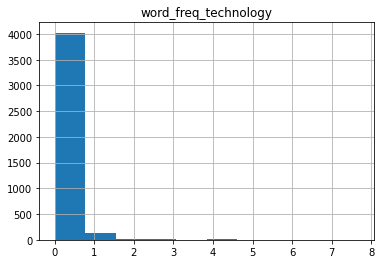

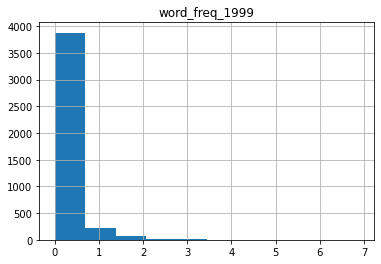

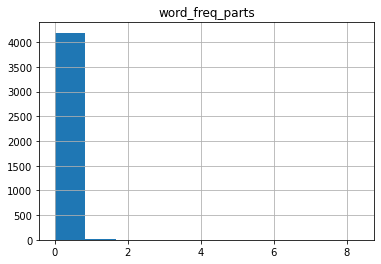

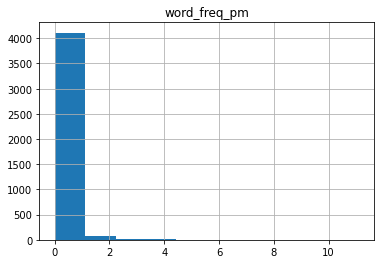

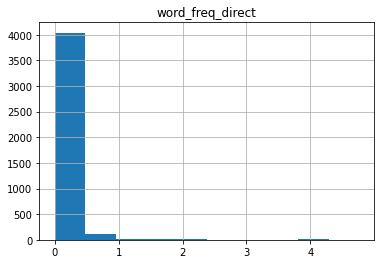

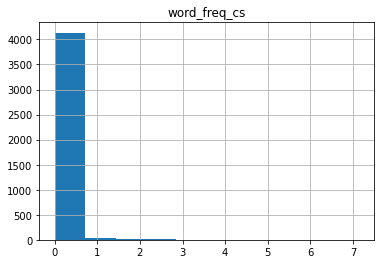

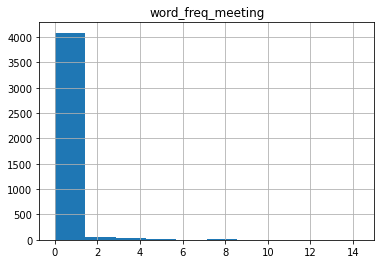

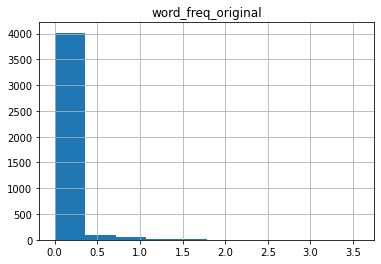

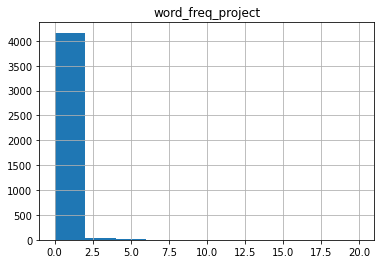

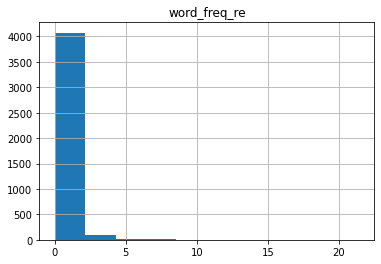

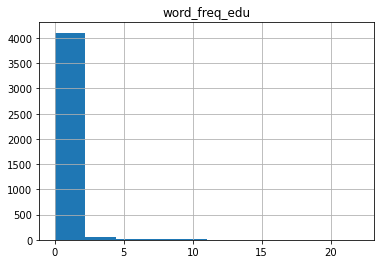

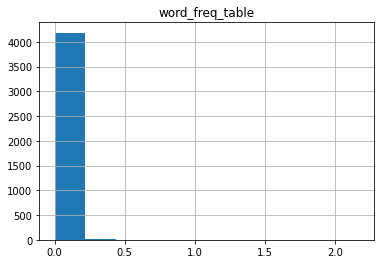

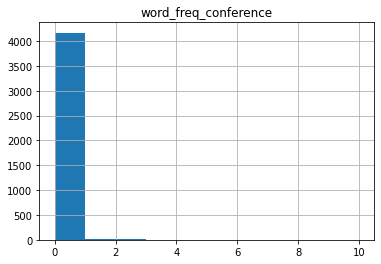

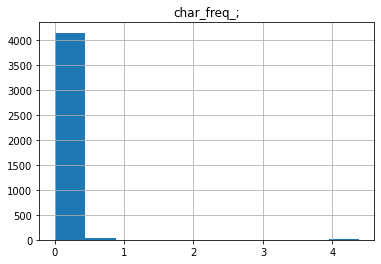

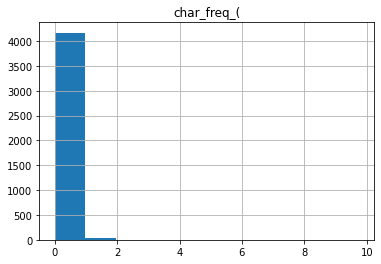

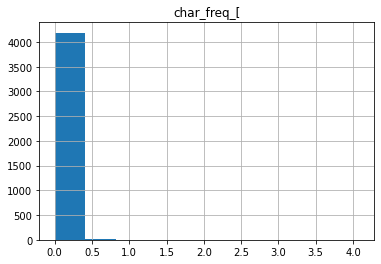

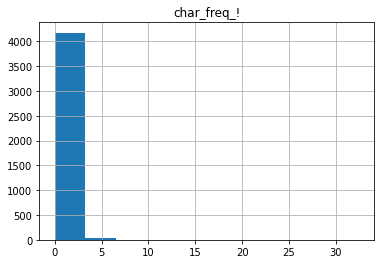

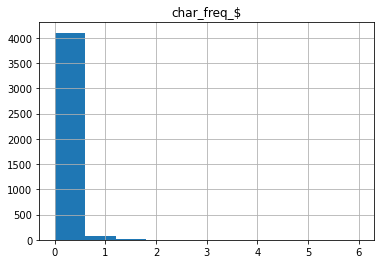

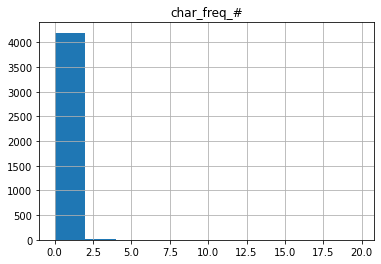

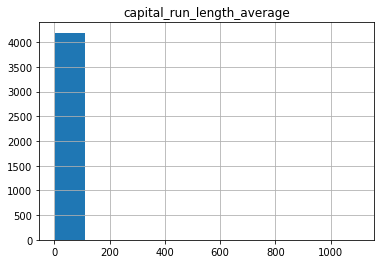

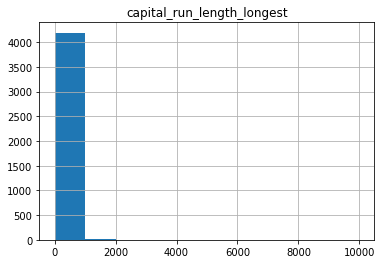

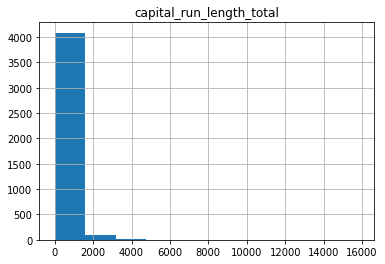

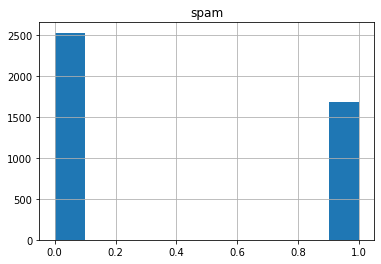

In [11]:
#histogram
for i in df.columns:
  df.hist(i)

In [12]:
#Data descriptive statistics
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,0.056686,0.565204,0.097656,0.061211,0.044803,0.253829,0.149154,0.188755,1.718368,0.084962,0.810040,0.131587,0.100622,0.090969,0.573995,0.279330,0.369838,0.128575,0.098382,0.103779,0.063544,0.044917,0.102333,0.045777,0.107881,0.099368,0.143482,0.014190,0.084057,0.061278,0.041432,0.141542,0.048772,0.085266,0.320124,0.189375,0.005786,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,0.184167,0.882513,0.309309,0.346066,0.242186,0.797534,0.457669,0.541133,1.768760,0.505583,1.149352,1.071258,0.351336,0.431723,1.676539,0.905553,1.775330,0.535429,0.576796,0.439568,0.387267,0.300748,0.569146,0.301812,0.530263,0.386470,0.424508,0.230512,0.447991,0.319520,0.318177,0.793803,0.231871,0.646096,1.045914,0.928308,0.079170,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [13]:
#Skewness and kurtosis of the data

for i in df.columns:
  print(i)
  print("\nThe skewness is:", df[i].skew())
  print("The kurtosis is:", df[i].kurt())
  s= abs(df[i].skew())
  if s > 1:
    print('\nhighly skewed distribution')
  else:
    print('\nlightly skewed distribution')
  k = df[i].kurt()
  if k >3:
    print('the distribution is heavy-tailed(leptokutic)')
  elif k < 3:
    print('Distribution is light tailed')
  print('\n',"******"*10, '\n')

word_freq_make

The skewness is: 5.869855242999023
The kurtosis is: 54.35140555393713

highly skewed distribution
the distribution is heavy-tailed(leptokutic)

 ************************************************************ 

word_freq_address

The skewness is: 13.464663617099461
The kurtosis is: 306.6859733110557

highly skewed distribution
the distribution is heavy-tailed(leptokutic)

 ************************************************************ 

word_freq_all

The skewness is: 2.980622758226944
The kurtosis is: 12.941446887016067

highly skewed distribution
the distribution is heavy-tailed(leptokutic)

 ************************************************************ 

word_freq_3d

The skewness is: 27.209539135206047
The kurtosis is: 788.3700579065502

highly skewed distribution
the distribution is heavy-tailed(leptokutic)

 ************************************************************ 

word_freq_our

The skewness is: 4.696945655413882
The kurtosis is: 37.06480080166446

highly skewed d

In [14]:
#variance and standard deviation of the variables defined in our columns
for i in df.columns:
  print('\n',i)
  print(f'standard deviation:  {df[i].std()}')
  print(f'variance:  {df[i].var()}','\n')
  print('***'*30)


 word_freq_make
standard deviation:  0.3000048929174964
variance:  0.09000293577443848 

******************************************************************************************

 word_freq_address
standard deviation:  0.45426003173290125
variance:  0.20635217642997647 

******************************************************************************************

 word_freq_all
standard deviation:  0.5157185414620596
variance:  0.26596561400775415 

******************************************************************************************

 word_freq_3d
standard deviation:  1.3524868029603305
variance:  1.8292205521818556 

******************************************************************************************

 word_freq_our
standard deviation:  0.6878051934276233
variance:  0.4730759841060102 

******************************************************************************************

 word_freq_over
standard deviation:  0.27603026758474924
variance:  0.07619270862290826 

******

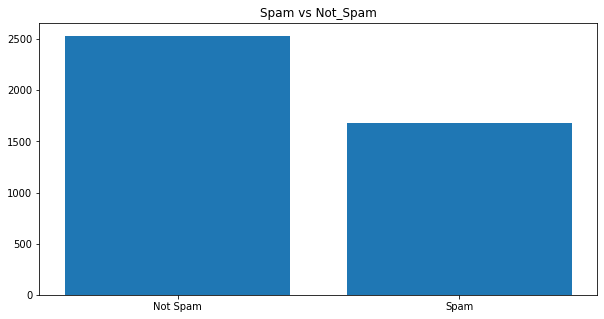

In [15]:
# let us see how many spam emails we have
spam_count = df.groupby('spam')['spam'].count()

plt.figure(figsize=(10,5))
plt.bar(spam_count.index, spam_count.values)
plt.title('Spam vs Not_Spam')
plt.xticks([0,1],['Not Spam', 'Spam'])

plt.show()

In [16]:
#Since the data is too large for a heatmap or pairplot, we use correlation dataframe
#Checking for correlation among variables
df.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,0.063031,0.075911,0.061985,0.032263,0.022454,0.065443,0.081471,0.051571,0.120563,0.020924,0.121458,-0.025574,0.126478,0.205689,-0.075054,-0.063467,-0.048086,-0.050054,-0.041541,-0.054241,-0.038899,-0.031634,-0.042715,-0.026322,-0.046083,-0.057296,-0.058771,-0.008626,-0.011199,-0.035467,-0.005280,-0.026546,-0.025603,-0.022980,-0.037848,-0.034455,-0.000950,-0.018904,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127,0.129194
word_freq_address,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,0.060724,0.026247,0.015538,0.012414,0.061826,0.046630,0.022018,0.178853,0.055876,-0.006735,0.117797,0.001214,0.007064,0.061282,-0.053573,-0.044627,-0.011228,-0.033000,-0.026048,-0.029419,-0.015937,0.028852,-0.032575,0.026039,-0.025524,-0.028262,0.003749,-0.012708,-0.016208,0.002326,-0.019350,-0.035908,0.037681,-0.029055,0.020029,-0.026004,-0.012337,-0.020947,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590,0.100651
word_freq_all,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,0.055647,0.065733,0.036431,0.004900,0.104574,0.061937,0.029834,0.110794,0.126502,0.030874,0.147895,-0.039464,0.106694,0.031150,-0.092684,-0.066464,-0.081297,-0.051471,-0.057847,-0.030519,-0.036610,-0.063579,-0.058002,-0.063417,-0.048968,-0.047593,-0.074329,0.031756,-0.017418,-0.046013,-0.030822,-0.007620,-0.052736,-0.056883,-0.056600,-0.060558,0.027384,-0.029465,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961,0.172350
word_freq_3d,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,-0.013191,-0.018577,-0.013153,0.003379,0.005375,0.005798,-0.002827,0.016561,-0.009933,-0.005006,0.004577,0.030589,0.014715,0.025851,-0.015702,-0.014030,-0.009710,-0.010630,-0.007931,-0.010911,-0.007654,-0.006967,-0.008246,-0.006975,-0.005907,-0.006309,-0.007436,-0.002723,-0.004506,-0.007654,-0.006075,-0.008318,-0.009384,-0.006114,-0.013178,-0.009432,-0.003409,-0.001861,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785,0.056383
word_freq_our,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,0.079164,0.055007,0.020657,0.001586,0.048309,0.079198,0.137868,0.050785,0.083092,0.027838,0.142992,-0.022715,0.062136,0.000321,-0.076783,-0.079807,-0.062482,-0.064151,0.039627,-0.053613,-0.042054,-0.024256,-0.034749,-0.024555,-0.051058,-0.052210,-0.077682,0.133057,-0.045512,-0.017580,-0.052325,0.107706,-0.054583,0.002771,-0.049497,-0.083315,-0.028146,-0.035040,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230074
word_freq_over,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,0.056592,0.001582,0.067278,0.007932,0.140009,0.016681,0.057684,0.059196,0.083312,0.057502,0.105693,0.006869,0.181754,0.059429,-0.086682,-0.089520,-0.05

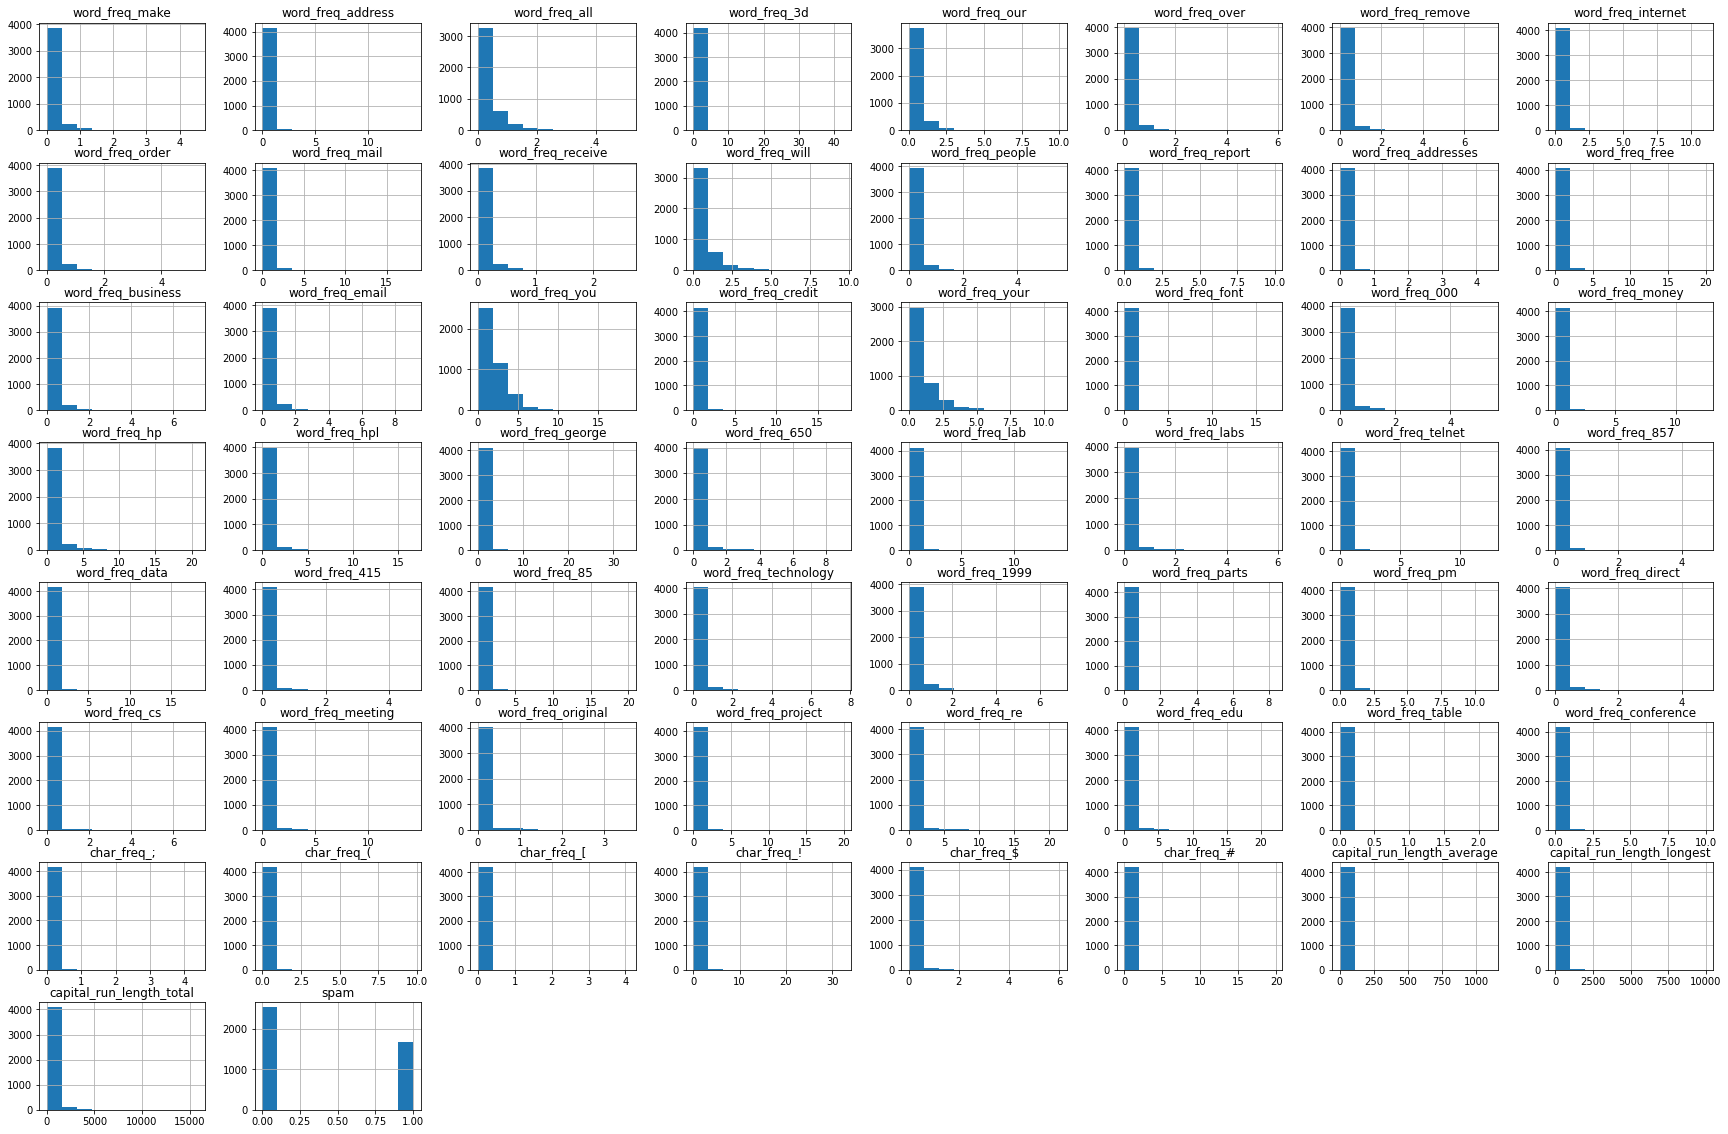

In [17]:
#histograms to see the distribution of the data
df.hist(figsize = (30,20));

#Naive Bayes Model

For this prediction we will use Multinomial model. This is beacause, A multinomial distribution is useful to model feature vectors where each value represents, for example, the number of occurrences of a term or its relative frequency.

In [18]:
#Define the x and y features
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

#we wil then scale the data usind standard scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# transform data
X = scaler.fit_transform(X,y)

#Model performance comparison dataframe
column_names = ['Model','test_size', 'Accuracy']
comparison = pd.DataFrame(columns = column_names)

# model_name = {'Model':'Geo', 'test_size':87, 'Accuracy':92}
# #append row to the dataframe
# comparison = comparison.append(model_name, ignore_index=True)

## Using 10% of the data as the test data

In [19]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=50)
# 

# Training our model
from sklearn.naive_bayes import MultinomialNB  
mnb = MultinomialNB().fit(X_train, y_train)
# 
# Predicting our test predictors

y_pred = mnb.predict(X_test)
# 

#Model performance
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report
import scipy.stats as stats

print('\n',confusion_matrix(y_test, y_pred))
print('\n',classification_report(y_test, y_pred))
print("MultinomialNB  accuracy using 10 as test size", accuracy_score(y_test,y_pred))

model_name = {'Model':'MultinomialNB', 'test_size':10, 'Accuracy':accuracy_score(y_test,y_pred)}
#append row to the dataframe
comparison = comparison.append(model_name, ignore_index=True)



 [[259  10]
 [ 33 119]]

               precision    recall  f1-score   support

           0       0.89      0.96      0.92       269
           1       0.92      0.78      0.85       152

    accuracy                           0.90       421
   macro avg       0.90      0.87      0.89       421
weighted avg       0.90      0.90      0.90       421

MultinomialNB  accuracy using 10 as test size 0.8978622327790974


* Using 10% of the data as the test size gives an accuracy of 89.78%. Out of the 421 emails predicted, 378 were accurate predictions while 43 were incorrently predicted.

* 89% of non spam[0] were accuarately predicted and 92% of spam[1] were also accurately predicted.

## Using 20% of the data as the test data

In [20]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)
# 

# Training our model
from sklearn.naive_bayes import MultinomialNB  
mnb = MultinomialNB().fit(X_train, y_train)
# 
# Predicting our test predictors

y_pred = mnb.predict(X_test)
# 

#Model performance
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report
import scipy.stats as stats

print('\n',confusion_matrix(y_test, y_pred))
print('\n',classification_report(y_test, y_pred))
print("MultinomialNB  accuracy using 20% as test size", accuracy_score(y_test,y_pred))

model_name = {'Model':'MultinomialNB', 'test_size':20, 'Accuracy':accuracy_score(y_test,y_pred)}
#append row to the dataframe
comparison = comparison.append(model_name, ignore_index=True)



 [[503  17]
 [ 69 253]]

               precision    recall  f1-score   support

           0       0.88      0.97      0.92       520
           1       0.94      0.79      0.85       322

    accuracy                           0.90       842
   macro avg       0.91      0.88      0.89       842
weighted avg       0.90      0.90      0.90       842

MultinomialNB  accuracy using 20% as test size 0.8978622327790974


* Using 20% of the data as the test size gives an accuracy of 89.78%. Out of the 842 emails predicted, 756 were accurate predictions while 86 were incorrently predicted.

* 91% of non spam[0] were accuarately predicted and 90% of spam[1] were also accurately predicted. This regard this split performed better than the 10% split.

## Using 30% of the data as the test data

In [21]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=50)
# 

# Training our model
from sklearn.naive_bayes import MultinomialNB  
mnb = MultinomialNB().fit(X_train, y_train)
# 
# Predicting our test predictors

y_pred = mnb.predict(X_test)
# 

#Model performance
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report
import scipy.stats as stats

print('\n',confusion_matrix(y_test, y_pred))
print('\n',classification_report(y_test, y_pred))
print("MultinomialNB  accuracy using 30% as test size", accuracy_score(y_test,y_pred))

model_name = {'Model':'MultinomialNB', 'test_size':30, 'Accuracy':accuracy_score(y_test,y_pred)}
#append row to the dataframe
comparison = comparison.append(model_name, ignore_index=True)


 [[737  31]
 [ 98 397]]

               precision    recall  f1-score   support

           0       0.88      0.96      0.92       768
           1       0.93      0.80      0.86       495

    accuracy                           0.90      1263
   macro avg       0.91      0.88      0.89      1263
weighted avg       0.90      0.90      0.90      1263

MultinomialNB  accuracy using 30% as test size 0.8978622327790974


* Using 30% of the data as the test size gives an accuracy of 89.78%. Out of the 1263 emails predicted, 1134 were accurate predictions while 129 were incorrently predicted.

* 88% of non spam[0] were accuarately predicted and 93% of spam[1] were also accurately predicted.

## Using 40% of the data as the test data

In [22]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=50)
# 

# Training our model
from sklearn.naive_bayes import MultinomialNB  
mnb = MultinomialNB().fit(X_train, y_train)
# 
# Predicting our test predictors

y_pred = mnb.predict(X_test)
# 

#Model performance
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report
import scipy.stats as stats

print('\n',confusion_matrix(y_test, y_pred))
print('\n',classification_report(y_test, y_pred))
print("MultinomialNB  accuracy using 40% as test size", accuracy_score(y_test,y_pred))

model_name = {'Model':'MultinomialNB', 'test_size':40, 'Accuracy':accuracy_score(y_test,y_pred)}
#append row to the dataframe
comparison = comparison.append(model_name, ignore_index=True)


 [[972  36]
 [157 519]]

               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1008
           1       0.94      0.77      0.84       676

    accuracy                           0.89      1684
   macro avg       0.90      0.87      0.88      1684
weighted avg       0.89      0.89      0.88      1684

MultinomialNB  accuracy using 40% as test size 0.8853919239904988


* Using 40% of the data as the test size gives an accuracy of 88.54%. Out of the 1684 emails predicted, 1494 were accurate predictions while 193 were incorrently predicted.

* 86% of non spam[0] were accuarately predicted and 94% of spam[1] were also accurately predicted. This regard this split performed better than the 10% split.

In [23]:
from pprint import pprint
pprint(mnb.get_params)

<bound method BaseEstimator.get_params of MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)>


##Using grid search to tune the model 

In [24]:
from sklearn.model_selection import GridSearchCV
import numpy as np
np.random.seed(999)
# Splitting the data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)
# 

mnb = MultinomialNB()

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
         }

# complement_nb_grid = GridSearchCV(ComplementNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
# complement_nb_grid.fit(X_digits,Y_digits)

clf = GridSearchCV(mnb, param_grid=params, n_jobs=-1, cv=30, verbose=5)
grid_model = clf.fit(X_train, y_train)
print("\nBest Score: ", clf.best_score_)
print("\nBest Params: ", clf.best_params_)

#Predicting x using the gid search best params

y_pred = grid_model.predict(X_test)
# 

#Model performance


print('\n',confusion_matrix(y_test, y_pred))
print('\n',classification_report(y_test, y_pred))
print("\nMultinomialNB  accuracy using grid search\n", accuracy_score(y_test,y_pred))

model_name = {'Model':'MultinomialNB_gridsearch', 'test_size':20, 'Accuracy':accuracy_score(y_test,y_pred)}
#append row to the dataframe
comparison = comparison.append(model_name, ignore_index=True)

Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.3s



Best Score:  0.8919168773704172

Best Params:  {'alpha': 0.01}

 [[503  17]
 [ 65 257]]

               precision    recall  f1-score   support

           0       0.89      0.97      0.92       520
           1       0.94      0.80      0.86       322

    accuracy                           0.90       842
   macro avg       0.91      0.88      0.89       842
weighted avg       0.91      0.90      0.90       842


MultinomialNB  accuracy using grid search
 0.9026128266033254


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.9s finished


* Grid search to tune the parameter gives an accuracy of 90.26%. Out of the 842 emails predicted, 760 were accurate predictions while 82 were incorrently predicted.

* 89% of non spam[0] were accuarately predicted and 94% of spam[1] were also accurately predicted. This regard this split performed better than the 10% split.

##  Feature selection with LDA

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA(n_components=30)

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#fit lda
ld_X = lda.fit(X,y)

# #Getting the column names
results = pd.DataFrame(index = X.columns.values,data= abs(ld_X.coef_[0]))
features = results.head(40).sort_values(0, ascending = False)
selected = features.index.values.tolist()
selected

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(57, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


['word_freq_remove',
 'word_freq_000',
 'word_freq_receive',
 'word_freq_over',
 'word_freq_internet',
 'word_freq_free',
 'word_freq_our',
 'word_freq_money',
 'word_freq_order',
 'word_freq_direct',
 'word_freq_credit',
 'word_freq_parts',
 'word_freq_your',
 'word_freq_labs',
 'word_freq_1999',
 'word_freq_business',
 'word_freq_email',
 'word_freq_font',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_all',
 'word_freq_will',
 'word_freq_addresses',
 'word_freq_technology',
 'word_freq_hp',
 'word_freq_telnet',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_pm',
 'word_freq_3d',
 'word_freq_make',
 'word_freq_you',
 'word_freq_lab',
 'word_freq_650',
 'word_freq_mail',
 'word_freq_address',
 'word_freq_people',
 'word_freq_report',
 'word_freq_857']

In [26]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split

X = df[selected]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)
# 

# Training our model
from sklearn.naive_bayes import MultinomialNB  
mnb = MultinomialNB().fit(X_train, y_train)
# 
# Predicting our test predictors

y_pred = mnb.predict(X_test)
# 

#Model performance
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report
import scipy.stats as stats

print('\n',confusion_matrix(y_test, y_pred))
print('\n',classification_report(y_test, y_pred))
print("MultinomialNB  accuracy using 20% as test size", accuracy_score(y_test,y_pred))


model_name = {'Model':'MultinomialNB_lda', 'test_size':20, 'Accuracy':accuracy_score(y_test,y_pred)}
#append row to the dataframe
comparison = comparison.append(model_name, ignore_index=True)


 [[380 140]
 [ 20 302]]

               precision    recall  f1-score   support

           0       0.95      0.73      0.83       520
           1       0.68      0.94      0.79       322

    accuracy                           0.81       842
   macro avg       0.82      0.83      0.81       842
weighted avg       0.85      0.81      0.81       842

MultinomialNB  accuracy using 20% as test size 0.8099762470308789


* Using LDA feature reduction gives an accuracy of 80.997%. Out of the 842 emails predicted, 682 were accurate predictions while 160 were incorrently predicted.

* 95% of non spam[0] were accuarately predicted and 68% of spam[1] were also accurately predicted. This regard this split performed better than the 10% split.

# Conclusion

In [27]:
#Model performance
comparison

,Model,test_size,Accuracy
0,MultinomialNB,10,0.897862
1,MultinomialNB,20,0.897862
2,MultinomialNB,30,0.897862
3,MultinomialNB,40,0.885392
4,MultinomialNB_gridsearch,20,0.902613
5,MultinomialNB_lda,20,0.809976


* The best performing model was the multinomial with grid search to get the best parameters. It gave an accuracy of 90.26%.


* Changing the sample size did not affect the model performance untill the test sicze of 40% was used, which reduced the accuracy.


* LDA feature selection gaave the lowest accuracy of all the models used.

### Challenging the solution

While we were able to achive an accuracy of 90%, more information on the data set should have been provided to assist in the feature selection.

* Did we have the right data and question?


>    The overall performance of all models was above 80% meaning that the data provided was the right data for this question.

